In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
file_path="lucas_soil_ndvi_new8_postive.csv"
file_path2="lucas_soil_CI_new8_postive.csv"
df=pd.read_csv(file_path)
df2=pd.read_csv(file_path2)
df = df.dropna(subset=['Min'])
df2 = df2.dropna(subset=['Min'])

In [36]:
from scipy import stats

# read data
ndvi_path="lucas_soil_ndvi_new8_postive.csv"
ci_path="lucas_soil_CI_new8_postive.csv"
ndmi_path="lucas_soil_ndmi_new8_postive.csv"
ndvi_df=pd.read_csv(ndvi_path)
ci_df=pd.read_csv(ci_path)
ndmi_df=pd.read_csv(ndmi_path)

# drop rows with missing values
ndvi_df = ndvi_df.dropna(subset=['Mean'])
ci_df = ci_df.dropna(subset=['Mean'])
ndmi_df = ndmi_df.dropna(subset=['Mean'])

ndvi_df['date'] = pd.to_datetime(ndvi_df['date'])
ndvi_df['month'] = ndvi_df['date'].dt.month

# Create a dataframe for PCA
df = pd.DataFrame()  # Define the variable df

df["CI_mean"] = ci_df["Mean"]
df["ndvi_mean"] = ndvi_df["Mean"]
df["ndmi_mean"] = ndmi_df["Mean"]
df["month"] = ndvi_df["month"]

df["N_level"] = ""  # Initialize the 'N_level' column

df["N"] = ci_df["N"]
df = df.dropna(subset=['ndvi_mean'])
df = df.dropna(subset=['ndmi_mean'])
# Calculate z-scores for the "N" attribute
z_scores = stats.zscore(df["N"])

# Define a threshold for outlier detection
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]




indices_to_drop = [37, 131, 162, 143, 175]
indices_to_drop = [index for index in indices_to_drop if index in df.index]
df = df.drop(indices_to_drop, axis=0)
df = df.reset_index(drop=True)



# set up high and low Nitrogen
for i in range(len(df)):
    if df["N"].iloc[i] >= df["N"].quantile(0.75):
        df.loc[i, "N_level"] = 2
    elif df["N"].iloc[i] >= df["N"].quantile(0.50):
        df.loc[i, "N_level"] = 1
    else:
        df.loc[i, "N_level"] = 0


In [46]:
X = df["ndvi_mean"].values.reshape(-1,1)
y = df["N"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()


print(np.corrcoef(X_train.reshape(-1), y_train.reshape(-1)))

[[ 1.         -0.10770373]
 [-0.10770373  1.        ]]


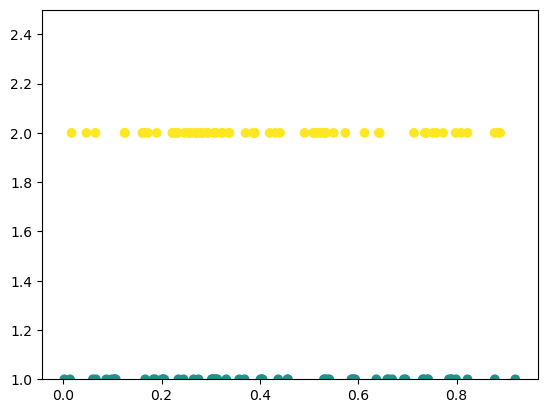

In [42]:


y_pred = regressor.predict(X)

plt.scatter(X, y,c=df["N_level"],cmap='viridis')
plt.plot(X, y_pred,color='k')

plt.ylim([1, 2.5])

plt.show()


In [7]:
from scipy import stats

# Assuming y_train is your data
z_scores = np.abs(stats.zscore(y_train ))

threshold = 3
outliers = np.where(z_scores > threshold)

print(f'Outlier indices: {outliers}')

Outlier indices: (array([ 52,  95, 142, 148, 164], dtype=int64), array([0, 0, 0, 0, 0], dtype=int64))
